# <center>Построение простейших моделей прогнозирования</center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [2]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)

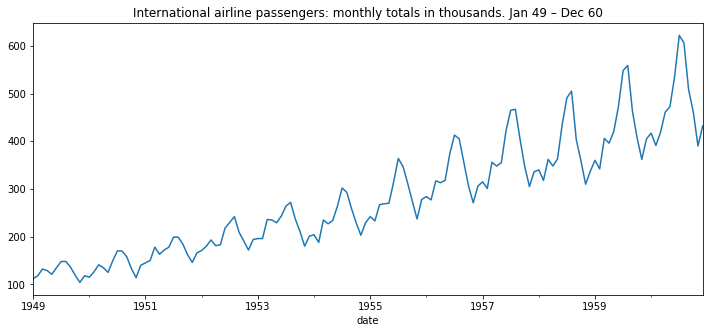

In [3]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

Временной ряд обладает трендом и годовой сезонностью, которые должны быть учтены при построении моделей прогнозирования. Наличие тренда и сезонности проявляется на коррелограмме. Для построения коррелограммы воспользуемся функцией `plot_acf` из библиотеки `statsmodels`.

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

Опция `lags` позволяет задавать количество лагов для вычисления значений автокорреляции.

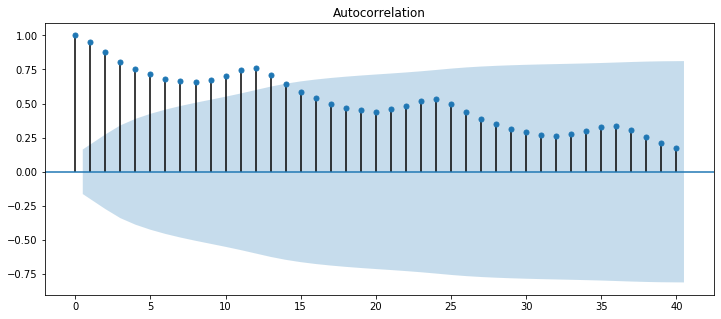

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(passengers['num_passengers'], lags=40, ax=ax)
plt.show()

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
Постройте наивную сезонную модель прогнозирования. Данная модель предполагает, что количество пассажиров в январе 1961 г. будет таким же, как и в январе 1960 г. С помощью полученной модели получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

#### Вариант 1.

In [6]:
vals = passengers['num_passengers'].values[-12:]

In [7]:
np.tile(vals, 3)

array([417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432, 417,
       391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432, 417, 391,
       419, 461, 472, 535, 622, 606, 508, 461, 390, 432], dtype=int64)

In [8]:
date1 = passengers.index[-1] + pd.DateOffset(months=1)
date2 = date1 + pd.DateOffset(months=35)

In [9]:
dates = pd.date_range(date1, date2, freq='MS')
dates

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [13]:
forecast = pd.DataFrame(dates)
forecast.columns = ['date']
forecast = forecast.set_index('date')
forecast['num_passengers'] = np.tile(vals, 3)

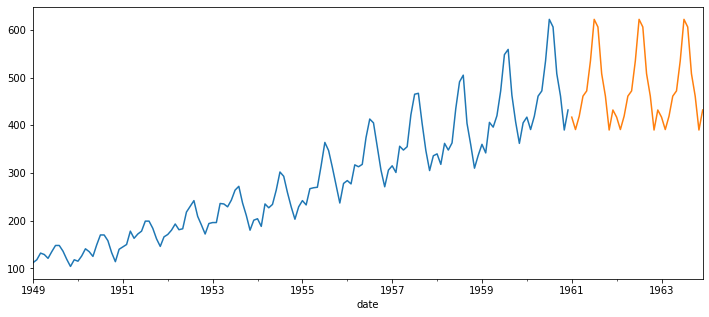

In [14]:
passengers['num_passengers'].plot(figsize=(12,5))
forecast['num_passengers'].plot()
plt.show()

#### Вариант 2.

In [15]:
passengers_copy = passengers.copy()

In [16]:
for date in dates:
    val = passengers_copy.loc[date - pd.DateOffset(years=1), 'num_passengers']
    passengers_copy.loc[date, 'num_passengers'] = val

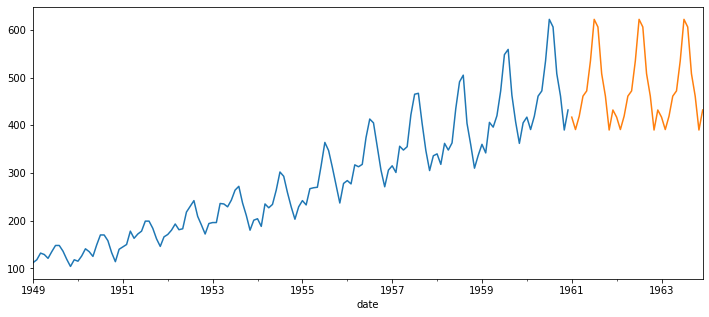

In [17]:
passengers_copy['num_passengers'].loc[:'1960Q4'].plot(figsize=(12,5))
passengers_copy['num_passengers'].loc['1961Q1':].plot()
plt.show()

In [10]:
# passengers['forecast'] = passengers['num_passengers'].values
# for date in dates:
#     val = passengers.loc[date - pd.DateOffset(years=1), 'forecast']
#     passengers.loc[date, 'forecast'] = val

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
Наивная сезонная модель прогнозирования не учитывает тренд временного ряда. Воспользуйтесь методом экстраполяции тренда, постройте прогноз также на 3 года и отобразите результат на графике.
    
<em>Комментарий: пока реализуйте только метод экстраполяции тренда! Не спешите объединять модели.</em>
<p></p>
  
</div>

In [18]:
y0 = passengers['num_passengers'][0]
yt = passengers['num_passengers'][-1]
coeff = (yt - y0) / (passengers.shape[0] - 1)

In [19]:
approximation = y0 + np.arange(passengers.shape[0])*coeff
future_trend = yt + np.arange(1,37)*coeff

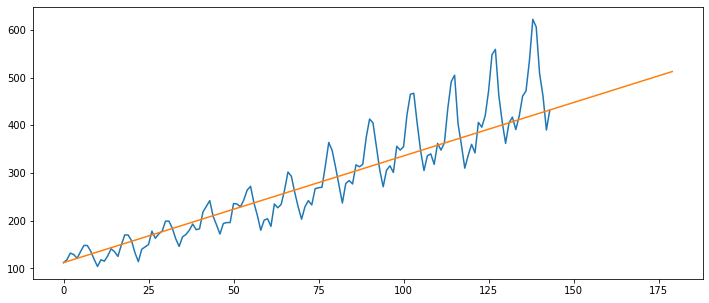

In [20]:
plt.subplots(figsize=(12,5))
plt.plot(passengers['num_passengers'].values)
plt.plot(np.append(approximation, future_trend))

plt.show()

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
В результате выполнения предыдущих заданий вы получили две модели, каждая из которых описывает только одну из компонент ряда: либо тренд, либо сезонность. Попробуем их объединить. Для этого:
    <p></p>
    <li>вычтите из исходного ряда трендовую составляющую, постройте коррелограмму полученного ряда остатков;</li>
    <li>для ряда остатков постройте наивную сезонную модель.</li>
    
 Получите прогноз на 3 года вперед с помощью комбинации моделей. Результат отобразите на графике.
<p></p>
  
</div>

In [21]:
passengers['trend'] = approximation
passengers['seasonality'] = passengers['num_passengers'] - approximation

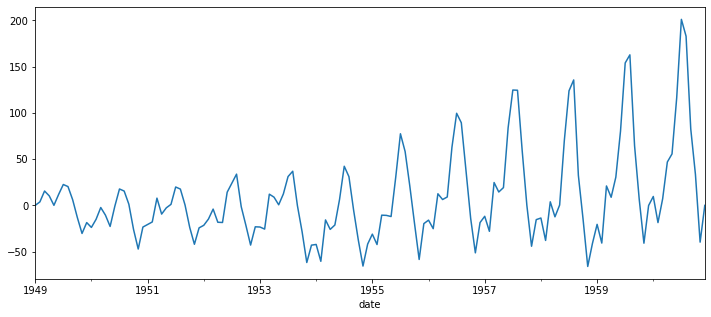

In [22]:
passengers['seasonality'].plot(figsize=(12,5))
plt.show()

In [23]:
future_seasonality = np.tile(passengers['seasonality'].values[-12:], 3)
future_trend + future_seasonality

array([443.85314685, 417.85314685, 445.85314685, 487.85314685,
       498.85314685, 561.85314685, 648.85314685, 632.85314685,
       534.85314685, 487.85314685, 416.85314685, 458.85314685,
       470.70629371, 444.70629371, 472.70629371, 514.70629371,
       525.70629371, 588.70629371, 675.70629371, 659.70629371,
       561.70629371, 514.70629371, 443.70629371, 485.70629371,
       497.55944056, 471.55944056, 499.55944056, 541.55944056,
       552.55944056, 615.55944056, 702.55944056, 686.55944056,
       588.55944056, 541.55944056, 470.55944056, 512.55944056])

In [24]:
passengers_copy = passengers.copy()

In [25]:
for date, val in zip(dates, future_trend + future_seasonality):
    passengers_copy.loc[date, 'forecast'] = val

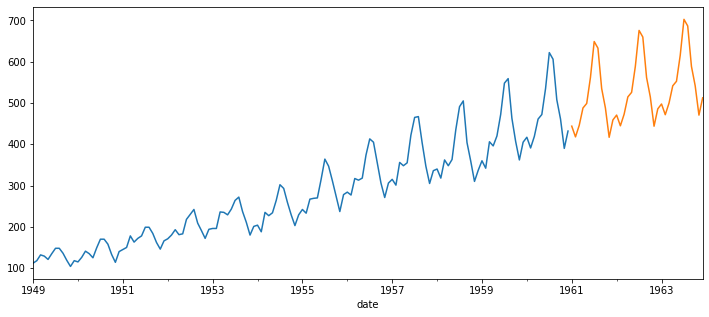

In [26]:
passengers_copy['num_passengers'].plot(figsize=(12,5))
passengers_copy['forecast'].plot()
plt.show()

### Мультипликативная сезонность

Во временном ряду пассажирских авиаперевозок наблюдается **мультипликативная сезонность**, которая характеризуется увеличением амплитуды сезонных колебаний. В случае когда амплитуда сезонных колебаний не меняется, говорят об **аддитивной сезонности**.

Ряд с трендом и аддитивной сезонностью может быть представлен в виде суммы его компонент:

$$y(t)=b(t)+s(t)+\epsilon(t),$$

где $b(t)$ &ndash; трендовая, $s(t)$ &ndash; сезонная, а $\epsilon(t)$ &ndash; случайная компоненты ряда.

Ряд с мультипликативной сезонностью представляет собой произведение данных компонент:

$$y(t)=b(t)\times s(t)\times \epsilon(t).$$

<div class="alert alert-info">

<h3> Задание 4</h3>
<p></p>
Постройте мультипликативную модель прогнозирования, получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [27]:
passengers['mult_seasonality'] = passengers['num_passengers'] / approximation

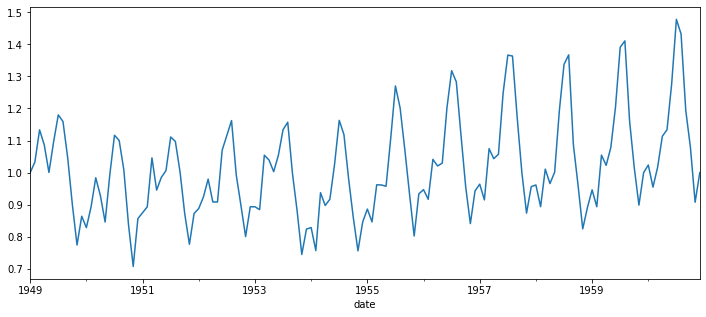

In [28]:
passengers['mult_seasonality'].plot(figsize=(12,5))
plt.show()

In [29]:
mult_seasonality = np.tile(passengers['mult_seasonality'].values[-12:], 3)
future_trend * mult_seasonality

array([444.48695413, 416.63234089, 446.31866341, 490.89462307,
       502.44342919, 569.3223737 , 661.69157139, 644.46601428,
       540.07576953, 489.95577074, 414.368654  , 458.85314685,
       471.97390827, 442.26468178, 473.63732681, 520.78924615,
       532.88685837, 603.64474739, 701.38314278, 682.93202856,
       572.15153907, 518.91154148, 438.73730799, 485.70629371,
       499.4608624 , 467.89702267, 500.95599022, 550.68386922,
       563.33028756, 637.96712109, 741.07471417, 721.39804285,
       604.2273086 , 547.86731222, 463.10596199, 512.55944056])

In [30]:
for date, val in zip(dates, future_trend * mult_seasonality):
    passengers_copy.loc[date, 'multiplicative'] = val

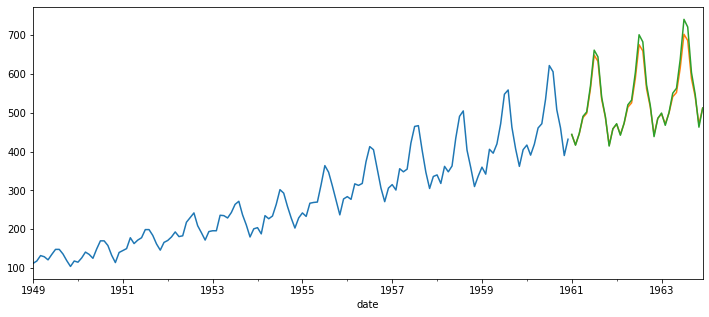

In [31]:
passengers_copy['num_passengers'].plot(figsize=(12,5))
passengers_copy['forecast'].plot()
passengers_copy['multiplicative'].plot()
plt.show()